![erd](data/lego_erd.png)

## 💾 The data

#### You received access to a database with the following tables. You can also see above a visualization of how the tables are related to each other. ([source](https://rebrickable.com/downloads)):

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Create a visualization for item 2.
4. What are the 5 most popular colors used in Lego parts?
5. [Optional] What proportion of Lego parts are transparent?
6. [Optional] What are the 5 rarest lego bricks?
7. Summarize your findings.

## Average number of Lego sets released per year

In [3]:
WITH count_sets AS (
SELECT
	year,
	COUNT(*)
FROM sets
GROUP BY year
ORDER BY year
)

SELECT 
	COUNT(year) AS year_duration,
	ROUND(AVG(count)) AS average_sets_per_year
FROM count_sets;

year_duration,average_sets_per_year
<int>,<int>
66,177


## Overall average number of Lego parts per year

In [4]:
WITH count_parts AS
(
SELECT
	year,
	SUM(num_parts) as total_parts
FROM sets
GROUP BY year
ORDER BY year
)

SELECT
	COUNT(year) AS year_duration,
	ROUND(AVG(total_parts)) AS average_parts_per_year
FROM count_parts;

year_duration,average_parts_per_year
<int>,<int>
66,28698


## Average number of Lego parts in each year

In [27]:
SELECT
	year,
	ROUND(AVG(num_parts)) as avg_parts
FROM sets
GROUP BY year
ORDER BY year;

year,avg_parts
<int>,<int>
1950,10
1953,17
1954,12
1955,37
1956,19
1957,43
1958,44
1959,16
1960,175


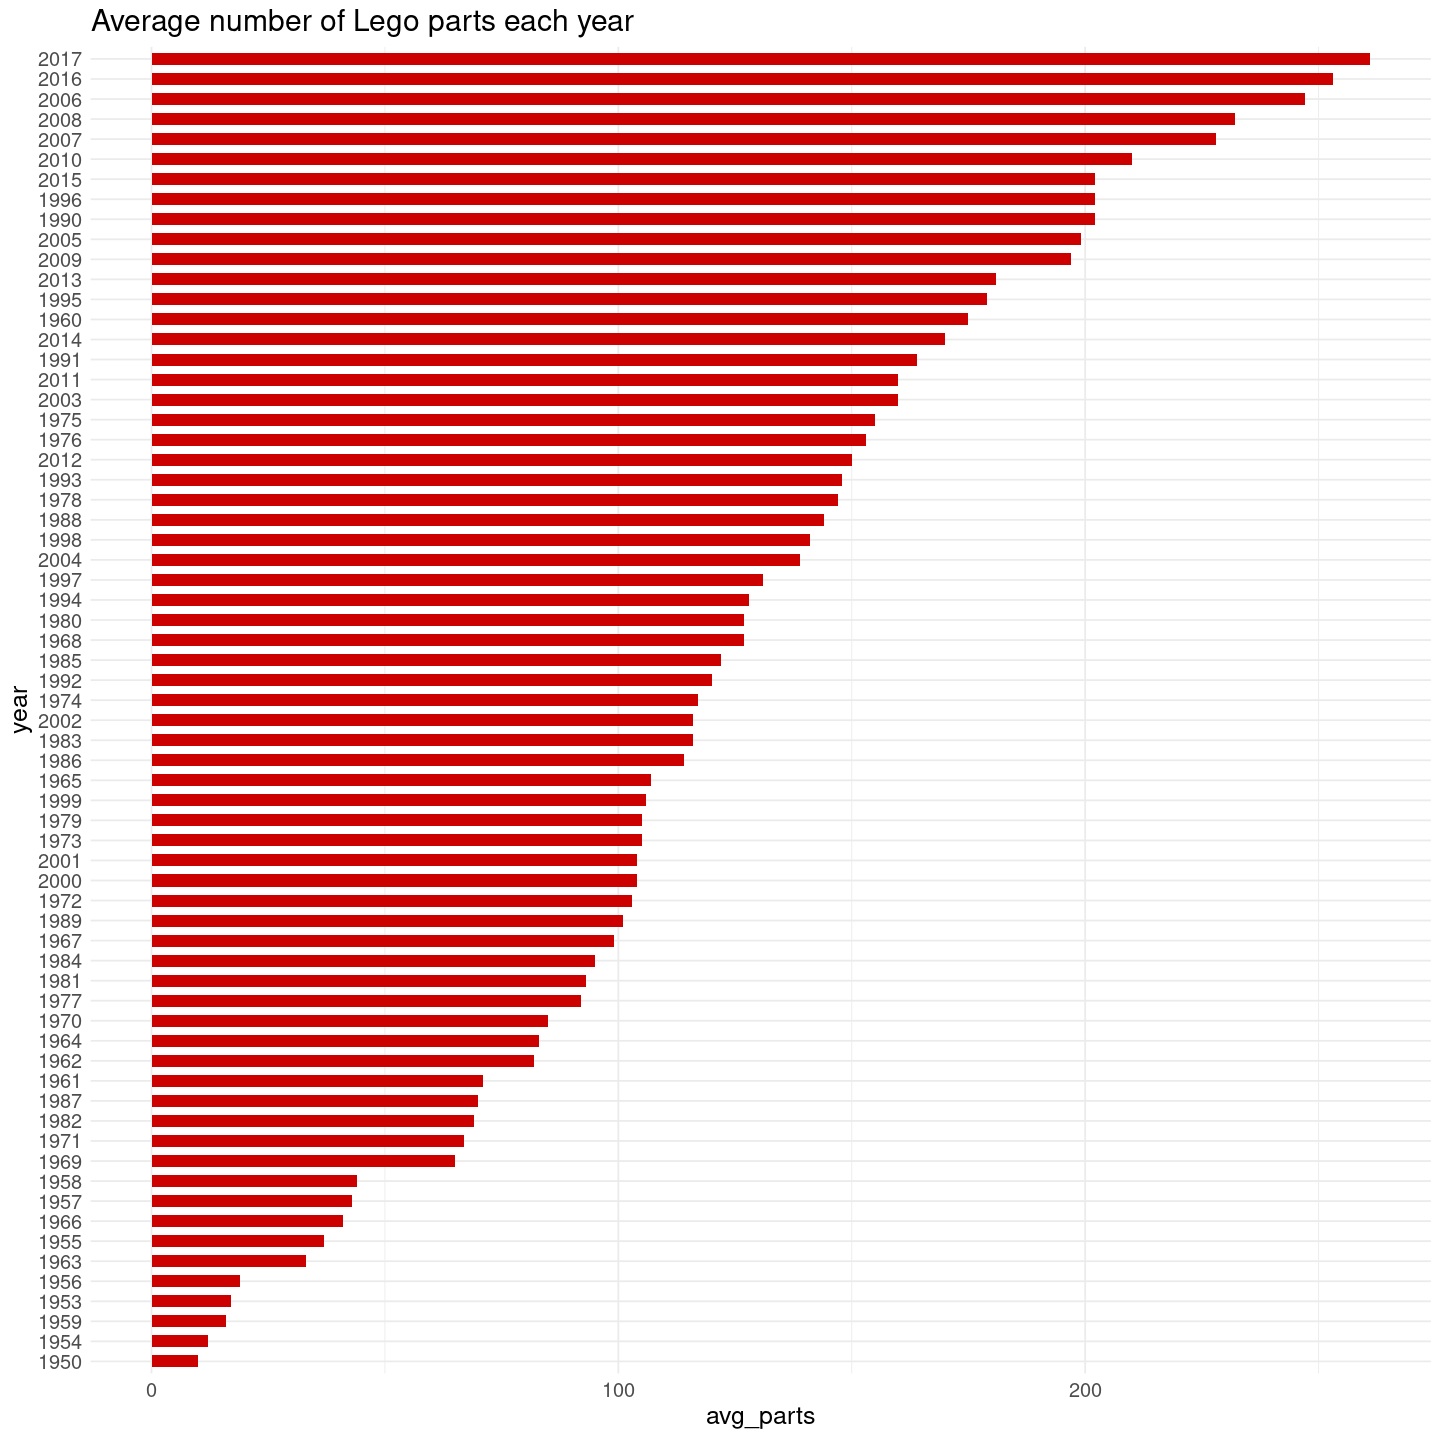

In [48]:
options(repr.plot.width=12, repr.plot.height=12)
ggplot(df2, aes(year, avg_parts)) +
    geom_col(width=0.6, fill = 'red3') +
    theme_minimal() + coord_flip() +
    theme(text = element_text(size = 15)) +
    labs(title = 'Average number of Lego parts each year')

## What are the 5 most popular colors used in Lego parts?

In [6]:
SELECT
	c.name,
	COUNT(*) AS number_color_used
FROM colors AS c
INNER JOIN inventory_parts AS invp 
ON c.id = invp.color_id
GROUP BY c.name
ORDER BY number_color_used DESC
LIMIT 5;

name,number_color_used
<chr>,<int>
Black,115085
White,66536
Light Bluish Gray,55302
Red,50213
Dark Bluish Gray,43907


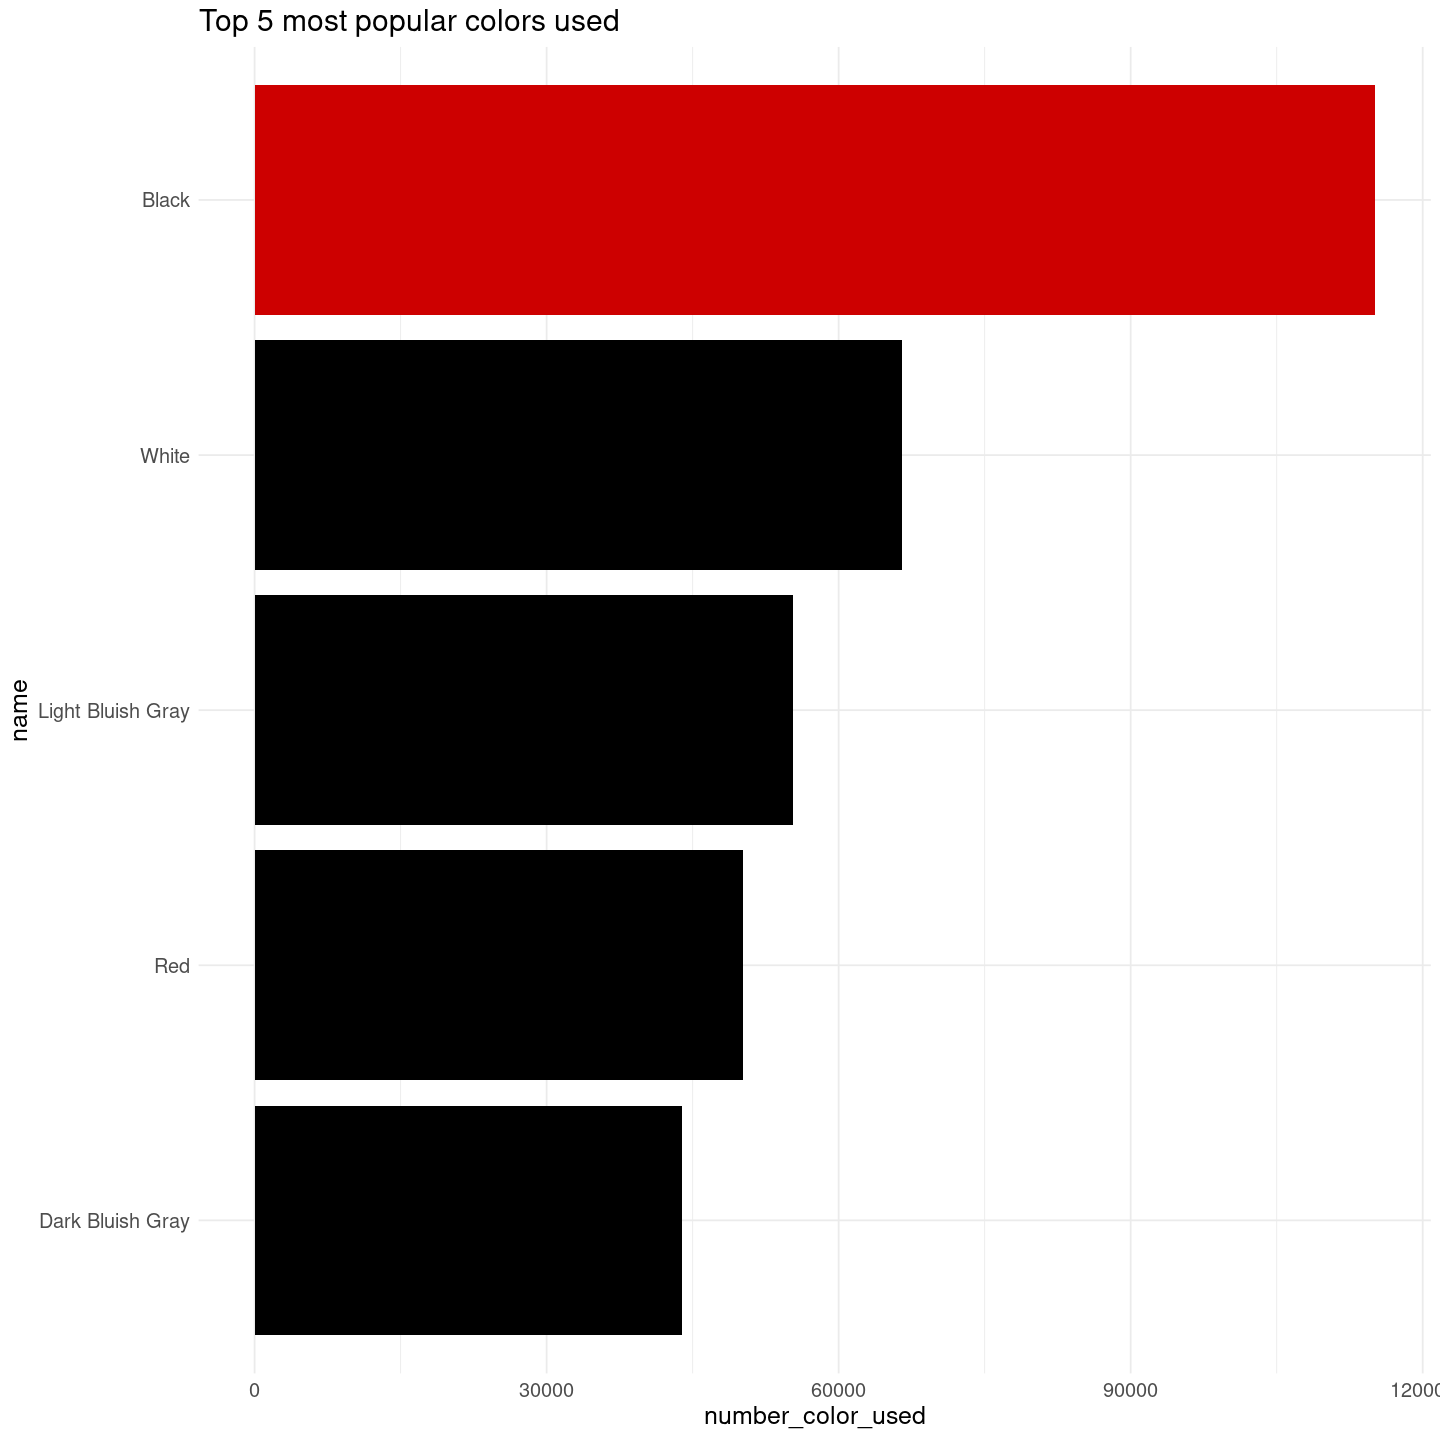

In [45]:
suppressPackageStartupMessages(library(tidyverse))
df3$name <- fct_reorder(df3$name,df3$number_color_used)
max_index <- which.max(df3$number_color_used)
ggplot(df3, aes(name, number_color_used)) +
    coord_flip() + theme_minimal() + theme() +
    theme(text = element_text(size = 15)) +
    geom_col(fill = ifelse(1:length(df3$number_color_used) == max_index, "red3", "black")) +
    labs(title = 'Top 5 most popular colors used')


## What proportion of Lego parts are transparent?

In [50]:
WITH trans AS (SELECT COUNT(*) AS trans_count FROM colors WHERE is_trans = TRUE),
cols AS (SELECT COUNT(*) AS all_cols FROM colors)

SELECT 
	trans.trans_count,
	cols.all_cols,
	ROUND((100.0 * trans.trans_count / cols.all_cols),2) AS transparent_percent_prop
FROM trans,cols

trans_count,all_cols,transparent_percent_prop
<int>,<int>,<dbl>
28,135,20.74


## What are the 5 rarest lego bricks?

In [47]:
SELECT
	p.part_num,
	p.name,
	SUM(invp.quantity) AS quantity
FROM inventory_parts AS invp
INNER JOIN parts AS p
ON invp.part_num = p.part_num
GROUP BY p.name,p.part_num
ORDER BY quantity
LIMIT 5;

part_num,name,quantity
<chr>,<chr>,<int>
2525pr0001,Flag 6 x 4 with Skull with Crossed Cutlasses (Jolly Roger) Print on Both Sides,1
4162pr0003,Tile 1 x 8 with 'Fallingwater' Print,1
clikits067,"Clikits Plastic, Rectangle 14 x 8.5 with Rounded Corners and 7 Holes",1
75912stk02,Sticker Sheet 2 for 75912 - 20853/6109693 or 20852/6109690,1
970c00pr0444,Legs and Green Hips with Green Loincloth and White Paws Print,1


## Conclusion

### Average number of Lego sets per year
- Lego sets were released 177 sets per year on average over a span of 66 years.
### Average number of Lego parts per year
- Lego parts were released 28,698 parts per year on average over a span of 66 years.
- Lego parts have been continuously released in larger quantities over the span of 66 years.
### 5 most popualr colors used in Lego parts
- **Black : 115,085 pieces** (Most Popular) 
- White : 66,536 pieces
- Light bluish gray : 55,302 pieces
- Red : 50,213 pieces
- Dark bluish gray : 43,907 pieces
### Proportion of transparent Lego parts
- There are a total of 28 transparent Lego parts, which accounts for 20.74% of all the colors available.
### 5 most rarest Lego bricks
The rarest Lego bricks are the ones that have the fewest quantities or have only 1 in the inventory.
- Flag 6 x 4 with Skull with Crossed Cutlasses (Jolly Roger) Print on Both Sides
- Tile 1 x 8 with 'Fallingwater' Print
- Clikits Plastic, Rectangle 14 x 8.5 with Rounded Corners and 7 Holes
- Sticker Sheet 2 for 75912 - 20853/6109693 or 20852/6109690
- Legs and Green Hips with Green Loincloth and White Paws Print